___
# Trabalho Prático – Ferramentas e Transformações
**Estudante: Nathan Augusto Zacarias Xavier**

# Introdução

O objetivo deste trabalho prático é ter um contato com as ferramentas de simulação e programação. O software de simulação é o CoppeliaSim, enquanto a linguagem de programação indicada foi a Python, desenvolvido via Jupyter Notebook.

Alguns códigos foram previamente disponibilizados, facilitando o desenvolvimento e contato inicial com ambas plataformas, sendo que muitas delas foram também utilizadas neste trabalho.

___
## Questão 01
**Crie uma nova cena, adicione um robô móvel(e.g., Pioneer 3DX) e outros quatro elementos quaisquer diferentes (e.g., móveis, pessoas, outros robôs, etc) espalhados pelo ambiente.**

Foi proposta uma cena que possua os seguintes personagens:
- Um vaso de planta;
- Um armário;
- Uma divisória de vidro;
- Uma pessoa que se movimenta pelo caminho tanto no sentido de ida e volta, e;
- Um robô móvel Pioneer 3DX.

A escolha de tais objetos envolve as diferentes dificuldade de observação por um robô e diferentes tamanhos. O vaso de planta pode ser considerado um objeto pontual para um robô, enquanto a divisória indica um obstáculo que tenha uma única das dimensões de tamanho expressivo e, por fim, o armário indica um obstáculo um volumo no espaço.

Dentro dessa lógica, a pessoa, dependendo da distância do robô pode ser observado como dois pontos que se encontram em posições diferentes à medida que a simulação acontece.

___
## Questão 02
**Em seguida, você deverá modelar e representar todos os sistemas de coordenadas da cena. Isso deverá ser detalhadamente descrito e ilustrado na documentação por um diagrama.**

A partir da escolha dos itens e devida colocação na cena criada, a seguir é apresentada a localização e 

![title](Mapa1.png)

Para cada personagem na cena, observa-se os eixos de referência dos mesmos, sendo que as setas vermelha, verde e azul representam, respectivamente, os eixos X, Y e Z. A referência central na imagem indica as orientações globais de toda a cena, sendo esta colocada na origem do plano.


A linha verde sobre o piso representa os locais por onde a pessoa irá caminha, sendo  importante modelar toda a cena para que não houvessem colisões, principalmente entre a pessoa e o robô. Uma vez que não seria correto restringir o movimento do robô ao percurso da pessoa, considera-se que, durante o movimento, a pessoa poderia desviar do robô, ou simplesmente, passa por cima dele.

Para melhor descrever as localidades onde o robô poderia observar um obstáculo e também o movimento da pessoa, foi criado também o seguinte mapa de calor.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa
scenario = pd.DataFrame(np.zeros([51,51]));

Para a criação do mapa foi-se utilizada a variável ```scenario```, a qual descreve todos as posições nas quais o robô pode encontrar algum tipo de obstáculo ao longo do movimento. As posições foram coletadas de modo offline, a partir da análise de posições e dimensões dos obstáculos, apenas.

In [5]:
###
### Definição dos Obstáculos 
###    variável = [x, dx, y, dy]
###       x,  y = Posição Central
###       dx, dy = Tamanhos em cada eixo
###
parede1 = [-2.5, 0.1, 0, 5]
parede2 = [2.5, .1, 0, 5]
parede3 = [0, 5, -2.5, .1]
parede4 = [0, 5, 2.5, .1]
planta = [0.75, 0.3, 2.2, .3]
armario = [0.25, 1.2, -2, 0.58]
vidro = [-1.5, 2.02, 1, .04]

obstaculos = pd.DataFrame([parede1, parede2, parede3, parede4, planta, armario, vidro], 
                          index = ['Parede1', 'Parede2', 'Parede3', 'Parede4', 'Planta', 'Armário', 'Vidro'], 
                          columns = ['x', 'dx', 'y', 'dy'])

# Ajuste de Zero e Dimensões
obstaculos['x'] += 2.5;
obstaculos['y'] += 2.5;
obstaculos *= 10;

In [6]:
# Posições inicial e final - Pessoa
posBill0 = [-2, 0.28, -2, 0.18]
posBill1 = [-2, 0.28, 1.5, 0.18]

posBill = pd.DataFrame([posBill0, posBill1],
                       columns = ['x', 'dx', 'y', 'dy'])

# Ajuste de Zero e Dimensões
posBill['x'] +=2.5;
posBill['y'] +=2.5;
posBill*=10;


# Movimento Pessoa
movement = pd.DataFrame([[-2, -2, -2, 0],
                         [-2, 2, 0, 0],
                         [2, 2, 0, 1.5],
                         [-2, 2, 1.5, 1.5]],
                        columns = ['x0', 'x1', 'y0', 'y1'])

# Ajuste de Zero e Dimensões
movement += 2.5;
movement *= 10;

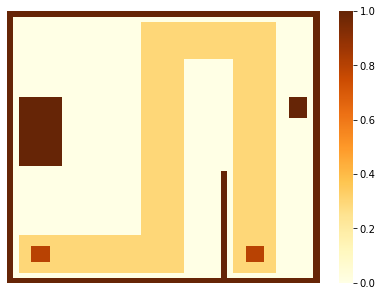

In [9]:
###
### Criação do Mapa de Calor
###
# Objetos
for index, pos in obstaculos.iterrows():
    scenario.iloc[round((pos['x']-pos['dx']/2)):round((pos['x']+pos['dx']/2))+1,
                  round((pos['y']-pos['dy']/2)):round((pos['y']+pos['dy']/2))+1]=1

# Movimento
for index, pos in movement.iterrows():
    scenario.iloc[round((pos['x0'])-3):round((pos['x1'])+3)+1,
                  round((pos['y0'])-3):round((pos['y1'])+3)+1]=.3

# Bill
for index, pos in posBill.iterrows():
    scenario.iloc[round((pos['x']-pos['dx']/2)):round((pos['x']+pos['dx']/2))+1,
                  round((pos['y']-pos['dy']/2)):round((pos['y']+pos['dy']/2))+1]+=.5

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(scenario, cmap="YlOrBr", xticklabels=False, yticklabels=False);
ax.invert_yaxis()

O mapa, portanto, demonstra as posições dos obstáculos e também o movimentos da pessoa, a paratir da seguinte coloração:

- As cores mais escuras indicam onde, com certeza, o robô encontra obstáculos, definidas a partir da localização e dimensão dos objetos fixos.
- Um pouco mais claro que os anteriores, são apresentadas as localizações onde a pessoa permanece por um tempo maior, que são as posições inicial e final do movimento.
- Ainda mais claro, é descrito um caminho que indica o movimento da pessoa na cena, ligando a posição inicial à final.
- Por fim, com a cor mais clara, são mostradas as localizações onde, com certeza, o robô não encontrará nenhum tipo de obstáculo, sendo áreas livres para o movimento.

Observa-se que as cores foram utilizadas apenas para a indicação de existência ou não de obstáculo, enquanto que os valores não remetem a nenhuma informação.

<div style="page-break-after: always;"></div>

## Quetão 03
**Considerando que a configuração do robô no referencial global é dada por q = [𝑥, 𝑦, 𝜃], defina as matrizes de transformação homogêneas que representam as posições de todos os outros elementos da cena no referencial local do robô. Escreva um script que plota esses referenciais e os relacionamentos entre eles (dica: você pode usar os códigos vistos em aula como base). Para os cálculos, as posições dos elementos devem ser recuperadas utilizando-se a RemoteAPI.**

Inicialmente, são definidas as funções e estruturas para comunicação com o CoppeliaSim importantes para todos os cálculos a serem realizados *a posteriori*.

Observa-se que, a partir deste ponto, o Coppelia deve estar ativado com os devidos objetos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math
import time

try:
    import sim
except:
    print ('"sim.py" could not be imported.')

# Matriz de Rotação
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = .5
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

Para a análise espacial dos objetos, faz-se necessário coletar as informações de Posição e Orientaçãode a partir de um referencial indicado para cada um dos objetos e do robô.

A partir do Remote API do CoppeliaSim, são adquiridas as posições ($x$, $y$ e $z$) e orientações ($\alpha$, $\beta$, $\gamma$) globais de cada objeto a partir dos seguintes comandos, respectivamente:

 - ```sim.simxGetObjectPosition()```
 - ```sim.simxGetObjectOrientation()```

Para descrever os objetos em relação ao Robô, foram necessárias realizar as seguintes transformações:

1. Transformação Inversa entre o Robô e o Referencial Global

$$ {}_{Robô}^{Global}T \rightarrow {}_{Global}^{Robô}T $$

2. Calcula a Transformação Composta entre o Robô, Objeto e o Referencial Global

$$ {}_{Objeto}^{Robô}T = {}_{Global}^{Robô}T \cdot {}_{Objeto}^{Global}T$$

Connected to remote API server
Number of objects in the scene:  119


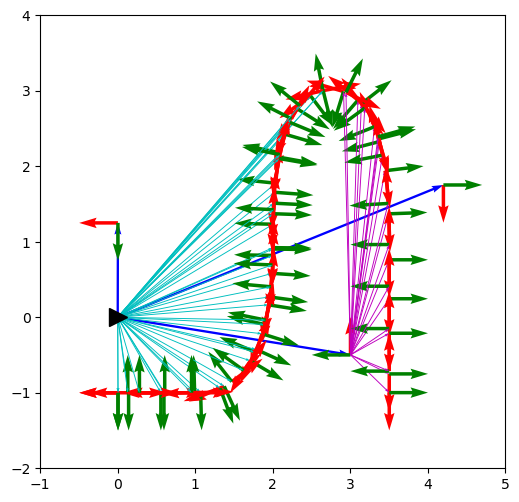

Program ended


In [2]:
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

filenames = []
nFiles = 0

plt.figure(figsize=(6,6), dpi=100)
plt.xlim([-1, 5])
plt.ylim([-2, 4])

if clientID!=-1:
    print ('Connected to remote API server')
    
    ###
    ### Aquisição de Dados Coppelia
    ###
    # Informações de Posição e Orientação do Robô
    robo = 'Pioneer_p3dx'
    returnCode, roboHandle = sim.simxGetObjectHandle(clientID, robo, sim.simx_opmode_oneshot_wait)
    returnCode, roboPosition = sim.simxGetObjectPosition(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação da Planta
    planta = 'indoorPlant'
    returnCode, plantaHandle = sim.simxGetObjectHandle(clientID, planta, sim.simx_opmode_oneshot_wait)
    returnCode, plantaPosition = sim.simxGetObjectPosition(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plantaOrientation = sim.simxGetObjectOrientation(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Armario
    armario = 'cupboard'
    returnCode, armarioHandle = sim.simxGetObjectHandle(clientID, armario, sim.simx_opmode_oneshot_wait)
    returnCode, armarioPosition = sim.simxGetObjectPosition(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, armarioOrientation = sim.simxGetObjectOrientation(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Vidro
    vidro = 'Pane'
    returnCode, vidroHandle = sim.simxGetObjectHandle(clientID, vidro, sim.simx_opmode_oneshot_wait)
    returnCode, vidroPosition = sim.simxGetObjectPosition(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, vidroOrientation = sim.simxGetObjectOrientation(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
 
    # Criação básica da Pessoa
    pessoa = 'Bill_base'
    returnCode, pessoaHandle = sim.simxGetObjectHandle(clientID, pessoa, sim.simx_opmode_oneshot_wait)
    pessoaPosition = []
    pessoaOrientation = []
    
    res,objs=sim.simxGetObjects(clientID,sim.sim_handle_all,sim.simx_opmode_blocking)
    if res==sim.simx_return_ok:
        print ('Number of objects in the scene: ',len(objs))
    else:
        print ('Remote API function call returned with error code: ',res)

    ###
    ### Transformação de Referências
    ###    G = Referências Globais
    ###    R = Robô
    ###    O = Objeto
    ###    P = Pessoa
    ###
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])

    # Definindo Tgr (Global -> Robô)
    pgr = roboPosition
    Rgr = Rz(roboOrientation[2])
    Tgr = np.column_stack((Rgr, pgr))
    Tgr = np.row_stack((Tgr, aux))
    
    # Invertendo Tgr->Trg
    Rrg = Rgr.T
    prg = -Rrg @ pgr
    Trg = np.column_stack((Rrg, prg.T))
    Trg = np.row_stack((Trg, aux))
    
    # Transformando Pgr -> Pr (Referência Robô)
    pg = roboPosition
    pg.append(1)
    pr = Trg @ pg
    plt.plot(pr[0], pr[1], 'k>', markersize=13)
    
    ###
    ### Objetos Estáticos: Armário, Planta e Vidro
    ###
    for (pos, ori) in zip([armarioPosition, plantaPosition, vidroPosition],
                          [armarioOrientation, plantaOrientation, vidroOrientation]):

        # Definindo Tgo (Global -> Objeto)
        pgo = pos
        Rgo = Rz(ori[2])
        Tgo = np.column_stack((Rgo, pgo))
        Tgo = np.row_stack((Tgo, aux))

        # Definindo Tro (Robô -> Objeto)
        Tro = Trg @ Tgo
        pro = np.array(Tro[:,3])
        Rro = Tro[:3,:3]
        
        # Plot Relação entre Robô->Objeto
        po = Tro @ pr
        plt.quiver(*pr[:2], *po[:2], color='b', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.005)
        plot_frame(pro, Rro, ['r', 'g'])
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
    

    time.sleep(2)
    startTime=time.time()
    sim.simxGetIntegerParameter(clientID,sim.sim_intparam_mouse_x,sim.simx_opmode_streaming) # Initialize streaming
    
    
    while time.time()-startTime < 20:
        returnCode, pessoaPosition = sim.simxGetObjectPosition(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, pessoaOrientation = sim.simxGetObjectOrientation(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        
        ###
        ### Movimento da pessoa
        ###
        # Definindo Tgp (Global -> Pessoa)
        pgp = pessoaPosition
        Rgp = Rz(pessoaOrientation[2])
        Tgp = np.column_stack((Rgp, pgp))
        Tgp = np.row_stack((Tgp, aux))

        # Definindo Tro (Robô -> Global -> Pessoa)
        Trp = Trg @ Tgp
        prp = np.array(Trp[:,3])
        Rrp = Trp[:3,:3]
        plot_frame(prp, Rrp, ['r', 'g'])
        
        # Relação com pessoa baseado na posição
        if (pessoaPosition[0]>.8):
            # Invertendo Tro->Tor
            Ror = Rro.T
            por = -Ror @ pro[:3]
            Tor = np.column_stack((Ror, por.T))
            Tor = np.row_stack((Tor, aux))

            # Definindo Top (Vidro -> Robô -> Pessoa)
            Top = Tor @ Trp
            pop = np.array(Top[:,3])
            Rop = Top[:3,:3]

            # Plot Relação entre Vidro->Pessoa (Referência Robô)
            pp = Rro @ pop[:3]
            plt.quiver(*po[:2], *pp[:2], color='m', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        else:
            # Plot Relação entre Robô->Pessoa
            pp = Trp @ pr
            plt.quiver(*pr[:2], *pp[:2], color='c', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
        
        time.sleep(0.05)
     
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    
    plt.show()
else:
    print ('Failed connecting to remote API server')
print ('Program ended')

###
### Construção do .gif
###
with imageio.get_writer('Questao3.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

Observa-se, portanto, diferentes posições centrais de cada objeto ao longo da simulação. Além disso, o percurso criado indica o movimento da pessoa na cena. Para melhor entender as transformações e relações entre os objetos na cena, existe a possibilidade de cálculo de qualquer relação, desde que conhecida a posição e orientação dos mesmos. Na imagem criada, as relações com os objetos fixos são indicapas pelas setas azuis, parte do movimento é criado a partir da visão do robô de cor ciano e uma outra parte do movimento, a partir da relação entre o vidro e a pessoa, dada pela cor rosa.

Conforme esperado, a imagem não é capaz de descrever informações como dimensões dos objetos, conforme previamente observado no mapa de calor criado.

Buscando demonstrar visualmente o movimento da pessoa na cena, foi-se produzido o arquivo *Questao3.gif*, o qual salvou as imagens à medida que estas eram criadas.

<div style="page-break-after: always;"></div>

## Quetão 04
**Coloque o robô em outras diferentes posições da cena (e.g., três) e faça os respectivos plots, verificando que a implementação funciona para diferentes casos (lembre-se de variar a orientação do robô). Coloque as imagens das cenas e os respectivos gráficos na documentação.**

Para verificar e confirmar todos os cálculos realizados, serão criadas outras duas simulações, modificando as posições e orientações do Pioneer na cena.

### Nova Posição 01

![title](Mapa2.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math
import time

try:
    import sim
except:
    print ('"sim.py" could not be imported.')

# Matriz de Rotação
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = .5
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

Connected to remote API server
Number of objects in the scene:  119


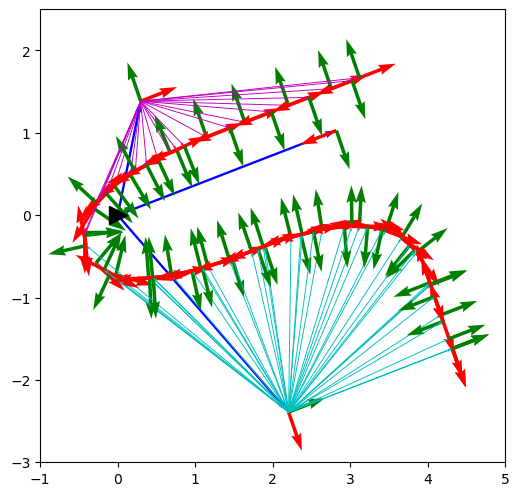

Program ended


In [2]:
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

filenames = []
nFiles = 0

plt.figure(figsize=(6,6), dpi=100)
plt.xlim([-1, 5])
plt.ylim([-3, 2.5])

if clientID!=-1:
    print ('Connected to remote API server')
    
    ###
    ### Aquisição de Dados Coppelia
    ###
    # Informações de Posição e Orientação do Robô
    robo = 'Pioneer_p3dx'
    returnCode, roboHandle = sim.simxGetObjectHandle(clientID, robo, sim.simx_opmode_oneshot_wait)
    returnCode, roboPosition = sim.simxGetObjectPosition(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação da Planta
    planta = 'indoorPlant'
    returnCode, plantaHandle = sim.simxGetObjectHandle(clientID, planta, sim.simx_opmode_oneshot_wait)
    returnCode, plantaPosition = sim.simxGetObjectPosition(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plantaOrientation = sim.simxGetObjectOrientation(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Armario
    armario = 'cupboard'
    returnCode, armarioHandle = sim.simxGetObjectHandle(clientID, armario, sim.simx_opmode_oneshot_wait)
    returnCode, armarioPosition = sim.simxGetObjectPosition(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, armarioOrientation = sim.simxGetObjectOrientation(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Vidro
    vidro = 'Pane'
    returnCode, vidroHandle = sim.simxGetObjectHandle(clientID, vidro, sim.simx_opmode_oneshot_wait)
    returnCode, vidroPosition = sim.simxGetObjectPosition(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, vidroOrientation = sim.simxGetObjectOrientation(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
 
    # Criação básica da Pessoa
    pessoa = 'Bill_base'
    returnCode, pessoaHandle = sim.simxGetObjectHandle(clientID, pessoa, sim.simx_opmode_oneshot_wait)
    pessoaPosition = []
    pessoaOrientation = []
    
    res,objs=sim.simxGetObjects(clientID,sim.sim_handle_all,sim.simx_opmode_blocking)
    if res==sim.simx_return_ok:
        print ('Number of objects in the scene: ',len(objs))
    else:
        print ('Remote API function call returned with error code: ',res)

    ###
    ### Transformação de Referências
    ###    G = Referências Globais
    ###    R = Robô
    ###    O = Objeto
    ###    P = Pessoa
    ###
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])

    # Definindo Tgr (Global -> Robô)
    pgr = roboPosition
    Rgr = Rz(roboOrientation[2])
    Tgr = np.column_stack((Rgr, pgr))
    Tgr = np.row_stack((Tgr, aux))
    
    # Invertendo Tgr->Trg
    Rrg = Rgr.T
    prg = -Rrg @ pgr
    Trg = np.column_stack((Rrg, prg.T))
    Trg = np.row_stack((Trg, aux))
    
    # Transformando Pgr -> Pr (Referência Robô)
    pg = roboPosition
    pg.append(1)
    pr = Trg @ pg
    plt.plot(pr[0], pr[1], 'k>', markersize=13)
    
    ###
    ### Objetos Estáticos: Armário, Planta e Vidro
    ###
    for (pos, ori) in zip([armarioPosition, vidroPosition, plantaPosition],
                          [armarioOrientation, vidroOrientation, plantaOrientation]):

        # Definindo Tgo (Global -> Objeto)
        pgo = pos
        Rgo = Rz(ori[2])
        Tgo = np.column_stack((Rgo, pgo))
        Tgo = np.row_stack((Tgo, aux))

        # Definindo Tro (Robô -> Objeto)
        Tro = Trg @ Tgo
        pro = np.array(Tro[:,3])
        Rro = Tro[:3,:3]
        
        # Plot Relação entre Robô->Objeto
        po = Tro @ pr
        plt.quiver(*pr[:2], *po[:2], color='b', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.005)
        plot_frame(pro, Rro, ['r', 'g'])
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
    
    ###
    ### Relações a serem utilizadas para Pessoa
    ###
    # Definindo Tga (Global -> Armario)
    pga = armarioPosition
    Rga = Rz(armarioOrientation[2])
    Tga = np.column_stack((Rga, pga))
    Tga = np.row_stack((Tga, aux))
    Tra = Trg @ Tga
    pra = np.array(Tra[:,3])
    Rra = Tra[:3,:3]
    pa = Tra @ pr

    time.sleep(2)
    startTime=time.time()
    sim.simxGetIntegerParameter(clientID,sim.sim_intparam_mouse_x,sim.simx_opmode_streaming) # Initialize streaming
    
    
    while time.time()-startTime < 20:
        returnCode, pessoaPosition = sim.simxGetObjectPosition(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, pessoaOrientation = sim.simxGetObjectOrientation(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        
        ###
        ### Movimento da pessoa
        ###
        # Definindo Tgp (Global -> Pessoa)
        pgp = pessoaPosition
        Rgp = Rz(pessoaOrientation[2])
        Tgp = np.column_stack((Rgp, pgp))
        Tgp = np.row_stack((Tgp, aux))

        # Definindo Tro (Robô -> Global -> Pessoa)
        Trp = Trg @ Tgp
        prp = np.array(Trp[:,3])
        Rrp = Trp[:3,:3]
        plot_frame(prp, Rrp, ['r', 'g'])
        
        # Relação com pessoa baseado na posição
        if (pessoaPosition[0]>.8):
            # Invertendo Tro->Tor
            Ror = Rro.T
            por = -Ror @ pro[:3]
            Tor = np.column_stack((Ror, por.T))
            Tor = np.row_stack((Tor, aux))

            # Definindo Top (Planta -> Robô -> Pessoa)
            Top = Tor @ Trp
            pop = np.array(Top[:,3])
            Rop = Top[:3,:3]

            # Plot Relação entre Planta->Pessoa (Referência Robô)
            pp = Rro @ pop[:3]
            plt.quiver(*po[:2], *pp[:2], color='m', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        else:
            # Invertendo Tro->Tor
            Rar = Rra.T
            par = -Rar @ pra[:3]
            Tar = np.column_stack((Rar, par.T))
            Tar = np.row_stack((Tar, aux))

            # Definindo Top (Armario -> Robô -> Pessoa)
            Tap = Tar @ Trp
            pap = np.array(Tap[:,3])
            Rap = Tap[:3,:3]

            # Plot Relação entre Armário->Pessoa (Referência Robô)
            pp = Rra @ pap[:3]
            plt.quiver(*pa[:2], *pp[:2], color='c', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
        
        time.sleep(0.05)
     
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    
    plt.show()
else:
    print ('Failed connecting to remote API server')
print ('Program ended')

###
### Construção do .gif
###
with imageio.get_writer('Questao4_a.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

Baseado na imagem e no arquivo *Questao4_a.gif*, observa-se que o deslocamento do robô não interfere nos demais objetos. Além disso, mesmo que se mude as relações entre objetos, é possível confirmar o correto cálculo entre eles, sendo as relações indicadas pelas cores:
 - Relação Robô e Objetos Fixos: **Azul**
 - Relação Armário e Pessoa: **Ciano**
 - Relação Planta e Pessoa: **Rosa**

___

Modificando uma segunda vez a posição do robô e observando a relação entre os objetos e o robô a partir da nova posição do robô, conforme imagem.


### Nova Posição 02

![title](Mapa3.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math
import time

try:
    import sim
except:
    print ('"sim.py" could not be imported.')

# Matriz de Rotação
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    
    axis_size = .5
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

Connected to remote API server
Number of objects in the scene:  119


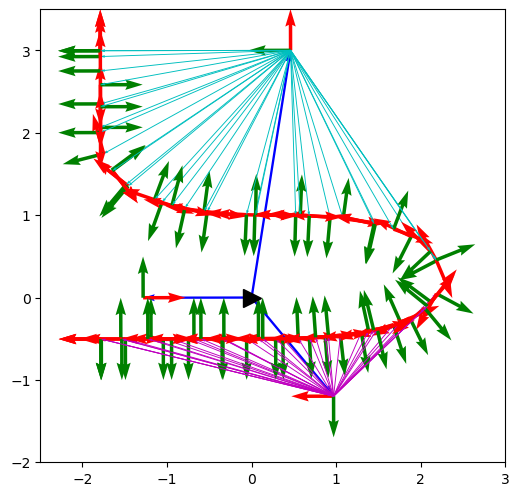

Program ended


In [2]:
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

filenames = []
nFiles = 0

plt.figure(figsize=(6,6), dpi=100)
plt.xlim([-2.5, 3])
plt.ylim([-2, 3.5])

if clientID!=-1:
    print ('Connected to remote API server')
    
    ###
    ### Aquisição de Dados Coppelia
    ###
    # Informações de Posição e Orientação do Robô
    robo = 'Pioneer_p3dx'
    returnCode, roboHandle = sim.simxGetObjectHandle(clientID, robo, sim.simx_opmode_oneshot_wait)
    returnCode, roboPosition = sim.simxGetObjectPosition(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, roboHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação da Planta
    planta = 'indoorPlant'
    returnCode, plantaHandle = sim.simxGetObjectHandle(clientID, planta, sim.simx_opmode_oneshot_wait)
    returnCode, plantaPosition = sim.simxGetObjectPosition(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plantaOrientation = sim.simxGetObjectOrientation(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Armario
    armario = 'cupboard'
    returnCode, armarioHandle = sim.simxGetObjectHandle(clientID, armario, sim.simx_opmode_oneshot_wait)
    returnCode, armarioPosition = sim.simxGetObjectPosition(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, armarioOrientation = sim.simxGetObjectOrientation(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)

    # Informações de Posição e Orientação do Vidro
    vidro = 'Pane'
    returnCode, vidroHandle = sim.simxGetObjectHandle(clientID, vidro, sim.simx_opmode_oneshot_wait)
    returnCode, vidroPosition = sim.simxGetObjectPosition(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, vidroOrientation = sim.simxGetObjectOrientation(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
 
    # Criação básica da Pessoa
    pessoa = 'Bill_base'
    returnCode, pessoaHandle = sim.simxGetObjectHandle(clientID, pessoa, sim.simx_opmode_oneshot_wait)
    pessoaPosition = []
    pessoaOrientation = []
    
    res,objs=sim.simxGetObjects(clientID,sim.sim_handle_all,sim.simx_opmode_blocking)
    if res==sim.simx_return_ok:
        print ('Number of objects in the scene: ',len(objs))
    else:
        print ('Remote API function call returned with error code: ',res)

    ###
    ### Transformação de Referências
    ###    G = Referências Globais
    ###    R = Robô
    ###    O = Objeto
    ###    P = Pessoa
    ###
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])

    # Definindo Tgr (Global -> Robô)
    pgr = roboPosition
    Rgr = Rz(roboOrientation[2])
    Tgr = np.column_stack((Rgr, pgr))
    Tgr = np.row_stack((Tgr, aux))
    
    # Invertendo Tgr->Trg
    Rrg = Rgr.T
    prg = -Rrg @ pgr
    Trg = np.column_stack((Rrg, prg.T))
    Trg = np.row_stack((Trg, aux))
    
    # Transformando Pgr -> Pr (Referência Robô)
    pg = roboPosition
    pg.append(1)
    pr = Trg @ pg
    plt.plot(pr[0], pr[1], 'k>', markersize=13)
    
    ###
    ### Objetos Estáticos: Armário, Planta e Vidro
    ###
    for (pos, ori) in zip([armarioPosition, vidroPosition, plantaPosition],
                          [armarioOrientation, vidroOrientation, plantaOrientation]):

        # Definindo Tgo (Global -> Objeto)
        pgo = pos
        Rgo = Rz(ori[2])
        Tgo = np.column_stack((Rgo, pgo))
        Tgo = np.row_stack((Tgo, aux))

        # Definindo Tro (Robô -> Objeto)
        Tro = Trg @ Tgo
        pro = np.array(Tro[:,3])
        Rro = Tro[:3,:3]
        
        # Plot Relação entre Robô->Objeto
        po = Tro @ pr
        plt.quiver(*pr[:2], *po[:2], color='b', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.005)
        plot_frame(pro, Rro, ['r', 'g'])
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
    
    ###
    ### Relações a serem utilizadas para Pessoa
    ###
    # Definindo Tga (Global -> Armario)
    pga = armarioPosition
    Rga = Rz(armarioOrientation[2])
    Tga = np.column_stack((Rga, pga))
    Tga = np.row_stack((Tga, aux))
    Tra = Trg @ Tga
    pra = np.array(Tra[:,3])
    Rra = Tra[:3,:3]
    pa = Tra @ pr

    time.sleep(2)
    startTime=time.time()
    sim.simxGetIntegerParameter(clientID,sim.sim_intparam_mouse_x,sim.simx_opmode_streaming) # Initialize streaming
    
    
    while time.time()-startTime < 20:
        returnCode, pessoaPosition = sim.simxGetObjectPosition(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, pessoaOrientation = sim.simxGetObjectOrientation(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
        
        ###
        ### Movimento da pessoa
        ###
        # Definindo Tgp (Global -> Pessoa)
        pgp = pessoaPosition
        Rgp = Rz(pessoaOrientation[2])
        Tgp = np.column_stack((Rgp, pgp))
        Tgp = np.row_stack((Tgp, aux))

        # Definindo Tro (Robô -> Global -> Pessoa)
        Trp = Trg @ Tgp
        prp = np.array(Trp[:,3])
        Rrp = Trp[:3,:3]
        plot_frame(prp, Rrp, ['r', 'g'])
        
        # Relação com pessoa baseado na posição
        if (pessoaPosition[0]>.8):
            # Invertendo Tro->Tor
            Ror = Rro.T
            por = -Ror @ pro[:3]
            Tor = np.column_stack((Ror, por.T))
            Tor = np.row_stack((Tor, aux))

            # Definindo Top (Planta -> Robô -> Pessoa)
            Top = Tor @ Trp
            pop = np.array(Top[:,3])
            Rop = Top[:3,:3]

            # Plot Relação entre Planta->Pessoa (Referência Robô)
            pp = Rro @ pop[:3]
            plt.quiver(*po[:2], *pp[:2], color='m', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        else:
            # Invertendo Tro->Tor
            Rar = Rra.T
            par = -Rar @ pra[:3]
            Tar = np.column_stack((Rar, par.T))
            Tar = np.row_stack((Tar, aux))

            # Definindo Top (Armario -> Robô -> Pessoa)
            Tap = Tar @ Trp
            pap = np.array(Tap[:,3])
            Rap = Tap[:3,:3]

            # Plot Relação entre Armário->Pessoa (Referência Robô)
            pp = Rra @ pap[:3]
            plt.quiver(*pa[:2], *pp[:2], color='c', angles='xy', scale_units='xy', scale=1, linestyle='dashdot', width = 0.002)
        
        ###
        ### Criação do .gif
        ###
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
        
        time.sleep(0.05)
     
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    
    plt.show()
else:
    print ('Failed connecting to remote API server')
print ('Program ended')

###
### Construção do .gif
###
with imageio.get_writer('Questao4_b.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

Modificando uma segunda vez, tem-se a confirmação do correto desenvolvimento da programação em Python da geração e aquisição das informações centrais dos objetos utilizados na imagem, observado no plot acima e no arquivo *Questao4_b.gif*.

Apesar da imagem indicar a localização do centro dos objetos, essa informação torna-se insignificante uma vez as demais dimensões não são observadas. Isso pode ser confirmado verificando a posição do robô no plot gerado e a distância da posição central da divisória de vidro.

Por fim, consideram-se as mesmas relações do item anterior, sendo elas:
 - Relação Robô e Objetos Fixos: **Azul**
 - Relação Armário e Pessoa: **Ciano**
 - Relação Planta e Pessoa: **Rosa**

<div style="page-break-after: always;"></div>

## Quetão 05
**Substitua agora o robô Pioneer adicionado na cena pelo robô com laser utilizado em aula. No exemplo que vimos, o plot da leitura do laser está sendo feito no referencial local do laser. Defina as transformações 𝑅 𝐿 𝑇 e 𝑊 𝑅 𝑇 , e em seguida modifique o script original para que os pontos agora sejam plotados no referencial global, de acordo com a posição atual do robô.**

Uma vez que o novo robô possui um laser sobre sua estrutura, faz-se necessário analisar as informações do Laser a partir do ponto de vista do Robô. Essa relação considera uma estrutura real, na qual a relação entre o laser e o robô seria conhecida e constante e, a partir dessa relação, analisa-se os demais obstáculos ao longo do percurso. Desta forma, inicialmente será necessário identificar a Matriz de Transformação ${}_{Laser}^{Robô}T$ e, em seguida, a analisar o Robô segundo o Referencial Global.

$${}_{Laser}^{Robô}T = {}_{Global}^{Robô}T \cdot {}_{Laser}^{Global}T$$

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

try:
    import sim
except:
    print ('"sim.py" could not be imported.')

# Matriz de Rotação
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):
    rotation = Rz(R[2])
    axis_size = .5
    axes = axis_size*rotation
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    
def format_laser_data(range_data, scan_range, step_size, max_sensor_range=5):
    laser_data = []
    range_data = np.asarray(range_data)
    pts = math.floor(scan_range/step_size)
    
    # Rotacionando 90 graus
    angle =- scan_range*0.5
    for i in range(pts):
        dist = range_data[i]
        if dist <= 0:
             dist = max_sensor_range
        laser_data.append([angle, dist])
        angle=angle+step_size
    return np.array(laser_data)

def draw_laser_data(roboPos, roboOri, laserPos, laserOri, laser_data, max_sensor_range=5):
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])
    
    ###
    ### Transformação Robô -> Laser
    ###
    # Invertendo Tgr (Global->Robô)
    pgr = roboPos
    Rgr = Rz(roboOri[2])
    Tgr = np.column_stack((Rgr, pgr))
    Tgr = np.row_stack((Tgr, aux))
    print('Matriz T(Global->Robô)\n', Tgr)

    Rrg = Rgr.T
    prg = -Rrg @ pgr
    Trg = np.column_stack((Rrg, prg))
    Trg = np.row_stack((Trg, aux))

    # Definindo Tgl (Global->Laser)
    pgl = [laserPos[0], laserPos[1], 0]
    Rgl = Rz(laserOri[2])
    Tgl = np.column_stack((Rgl, pgl))
    Tgl = np.row_stack((Tgl, aux))

    # Definindo Trl (Robô->Laser)
    Trl = Trg @ Tgl
    print('Matriz T(Robô->Laser)\n', Trl)
    
    # Posição Robô
    pr = [0,0,0,1]
    pg = Tgr @ pr
    plt.plot(pg[0], pg[1], 'k>', markersize=13)
    
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        pl = [dist*np.cos(ang), dist*np.sin(ang), 0, 1]
        
        prl = Trl @ pl
        
        ###
        ### Transformação Global -> Robô -> Laser
        ###
        #Definindo Tgl
        Tgl = Tgr @ Trl
        pgl = Tgl @ pl
        
        c = 'r'
        if ang < 0:    
                c = 'b'        
        plt.plot(pgl[0], pgl[1], 'o', color=c)

O código a seguir será responsável apenas por coletar as informações do cenário e plotar os gráficos, sendo retirados todos os demais controles do robô e demais considerações dinâmicas do sistema.

O resultado esperado são as matrizes de transformação ${}^{W}_{R}T$ e ${}^{R}_{L}T$ além da observação das distâncias de obstáculos medidas pelo laser.

Program started
Connected to remote API server
Matriz T(Global->Robô)
 [[ 9.99999981e-01  1.95403538e-04  0.00000000e+00 -2.00086951e+00]
 [-1.95403538e-04  9.99999981e-01  0.00000000e+00 -9.99986172e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.38641015e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Matriz T(Robô->Laser)
 [[ 1.00000000e+00 -1.64070952e-05  0.00000000e+00 -3.84808418e-04]
 [ 1.64070952e-05  1.00000000e+00  0.00000000e+00  4.21634158e-06]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.38641015e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


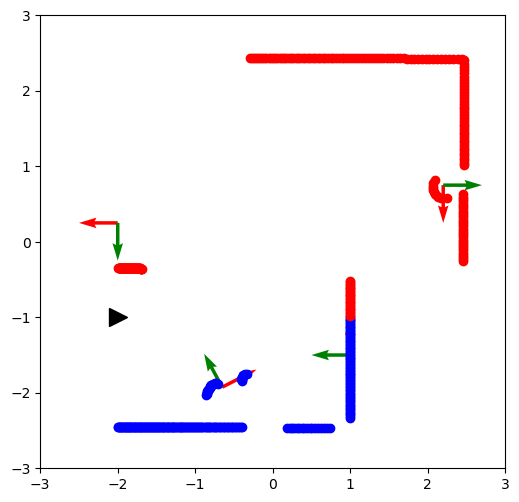

Program ended


In [14]:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

plt.figure(figsize=(6,6), dpi=100)
plt.xlim([-3, 3])
plt.ylim([-3, 3])

if clientID!=-1:
    print ('Connected to remote API server')

    ###
    ### Aquisição de Dados Coppelia
    ###
    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)
    
    # Informações de Posição e Orientação da Planta
    planta = 'indoorPlant'
    returnCode, plantaHandle = sim.simxGetObjectHandle(clientID, planta, sim.simx_opmode_oneshot_wait)
    returnCode, plantaPosition = sim.simxGetObjectPosition(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, plantaOrientation = sim.simxGetObjectOrientation(clientID, plantaHandle, -1, sim.simx_opmode_oneshot_wait)
    plot_frame(plantaPosition, plantaOrientation, ['r', 'g'])
    
    # Informações de Posição e Orientação do Armario
    armario = 'cupboard'
    returnCode, armarioHandle = sim.simxGetObjectHandle(clientID, armario, sim.simx_opmode_oneshot_wait)
    returnCode, armarioPosition = sim.simxGetObjectPosition(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, armarioOrientation = sim.simxGetObjectOrientation(clientID, armarioHandle, -1, sim.simx_opmode_oneshot_wait)
    plot_frame(armarioPosition, armarioOrientation, ['r', 'g'])

    # Informações de Posição e Orientação do Vidro
    vidro = 'Pane'
    returnCode, vidroHandle = sim.simxGetObjectHandle(clientID, vidro, sim.simx_opmode_oneshot_wait)
    returnCode, vidroPosition = sim.simxGetObjectPosition(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, vidroOrientation = sim.simxGetObjectOrientation(clientID, vidroHandle, -1, sim.simx_opmode_oneshot_wait)
    plot_frame(vidroPosition, vidroOrientation, ['r', 'g'])
    
    # Criação básica da Pessoa
    pessoa = 'Bill_base'
    returnCode, pessoaHandle = sim.simxGetObjectHandle(clientID, pessoa, sim.simx_opmode_oneshot_wait)
    returnCode, pessoaPosition = sim.simxGetObjectPosition(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, pessoaOrientation = sim.simxGetObjectOrientation(clientID, pessoaHandle, -1, sim.simx_opmode_oneshot_wait)
    plot_frame(pessoaPosition, pessoaOrientation, ['r', 'g'])
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)    
    
    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    returnCode, laserHandle = sim.simxGetObjectHandle(clientID, 'Hokuyo_URG_04LX_UG01_ROS_body', sim.simx_opmode_oneshot_wait)     

    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    
    # Leituras do Laser
    returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_oneshot_wait)
    returnCode, laserPosition = sim.simxGetObjectPosition(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, laserOrientation = sim.simxGetObjectOrientation(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
    
    raw_range_data = sim.simxUnpackFloats(string_range_data)
    
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    laser_data = format_laser_data(raw_range_data, scan_range, step_size)
    
    # Leituras do Robô
    returnCode, roboPosition = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    
    ###
    ### Plots da cena estática
    ###
    draw_laser_data(roboPosition, roboOrientation, laserPosition, laserOrientation, laser_data)
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
    plt.show()
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

Na imagem, foram colocados os pontos centrais de cada objeto em comparação às atividades anteriores. Observa-se que as informações de dimensão são também importantes para o deslocamento do robô. A imagem está toda dada na referência global.

No gráfico, observam-se algumas falhas os obstáculos e nos limites da cena, ocasionadas pela existência de objetos posicionados à frente destes.

<div style="page-break-after: always;"></div>

## Quetão 06

**Por fim, utilizando o script de navegação, faça um plot incremental que mostra o caminho executado pelo robô (linha tracejada) e junta todas as leituras de laser realizadas ao longo do trajeto. Essas informações devem ser todas representadas no referencial global.**

Novamente, para fazer o programa coletar os dados, faz-se as importações de bibliotecas e pacotes, assim como cria-se as mesmas funções referente às rotações e transformações das matrizes assim como função responsável por desenhar no mapa o sistema.

Observa-se que todas as transformações de referencial desenvolvidas anteriormente são, novamente, utilizadas neste item, uma vez que as questões de referencial ainda são consideradas.

O diferencial neste exercício é demonstrar a criação do mapa observado pelo robô enquanto existe o movimento deste, assim como observar possíveis erros de medição durante a simulação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math
import time

try:
    import sim
except:
    print ('"sim.py" could not be imported.')

# Matriz de Rotação
def Rz(theta):
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

def format_laser_data(range_data, scan_range, step_size, max_sensor_range=5):
    laser_data = []
    range_data = np.asarray(range_data)
    pts = math.floor(scan_range/step_size)
    
    # Rotacionando 90 graus
    angle =- scan_range*0.5
    for i in range(pts):
        dist = range_data[i]
        if dist <= 0:
             dist = max_sensor_range
        laser_data.append([angle, dist])
        angle=angle+step_size
    return np.array(laser_data)

def draw_laser_data(roboPos, roboOri, laserPos, laserOri, laser_data, max_sensor_range=5):
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])
    
    ###
    ### Transformação Robô -> Laser
    ###
    # Invertendo Tgr (Global->Robô)
    pgr = roboPos
    Rgr = Rz(roboOri[2])
    Tgr = np.column_stack((Rgr, pgr))
    Tgr = np.row_stack((Tgr, aux))
    
    Rrg = Rgr.T
    prg = -Rrg @ pgr
    Trg = np.column_stack((Rrg, prg))
    Trg = np.row_stack((Trg, aux))

    # Definindo Tgl (Global->Laser)
    pgl = [laserPos[0], laserPos[1], 0]
    Rgl = Rz(laserOri[2])
    Tgl = np.column_stack((Rgl, pgl))
    Tgl = np.row_stack((Tgl, aux))

    # Definindo Trl (Robô->Laser)
    Trl = Trg @ Tgl
    
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        pl = [dist*np.cos(ang), dist*np.sin(ang), 0, 1]
        
        prl = Trl @ pl
        
        ###
        ### Transformação Global -> Robô -> Laser
        ###
        #Definindo Tgl
        Tgl = Tgr @ Trl
        pgl = Tgl @ pl
        
        c = 'r'
        if ang < 0:    
                c = 'b'        
        plt.plot(pgl[0], pgl[1], 'o', color=c)

Diferente do exercício anterior, agora faz-se necessário implementar o movimento do robô, assim como, durante o movimento, tanto o mapa quanto o movimento do robô é apresentada no gráfico.

Program started
Connected to remote API server


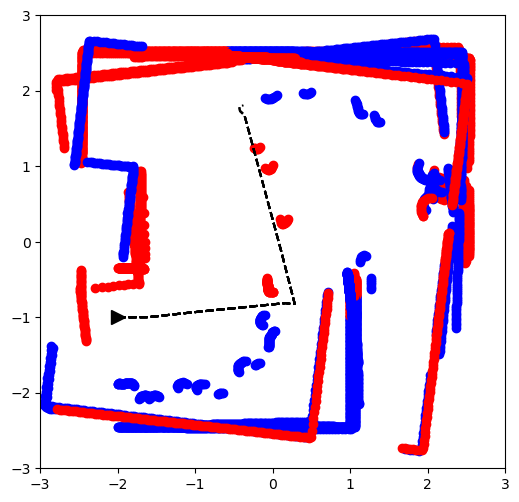

Program ended


In [8]:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

plt.figure(figsize=(6,6), dpi=100)
plt.xlim([-3, 3])
plt.ylim([-3, 3])

filenames = []
nFiles = 0

logRoboPos = []

if clientID!=-1:
    print ('Connected to remote API server')

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)    
    
    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    returnCode, laserHandle = sim.simxGetObjectHandle(clientID, 'Hokuyo_URG_04LX_UG01_ROS_body', sim.simx_opmode_oneshot_wait)     

    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    
    ###
    ### Aquisição de Dados Coppelia
    ###
    returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_oneshot_wait)
    returnCode, roboPosition = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, laserPosition = sim.simxGetObjectPosition(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
    returnCode, laserOrientation = sim.simxGetObjectOrientation(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)

    logRoboPos.append(roboPosition)

    raw_range_data = sim.simxUnpackFloats(string_range_data)
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    laser_data = format_laser_data(raw_range_data, scan_range, step_size)

    # Plot
    draw_laser_data(roboPosition, roboOrientation, laserPosition, laserOrientation, laser_data)
    plt.plot(roboPosition[0], roboPosition[1], '>k', markersize=10)
    
    ###
    ### Criação do .gif
    ###
    for i in range(0,2):
        nFiles += 1
        filename = f'Imagem {nFiles}.png'
        filenames.append(filename)
        plt.savefig(filename)
    
    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros
    t = 0
    # Lembrar de habilitar o 'Real-time mode'
    startTime=time.time()
    lastTime = startTime
    while t < 60:
        
        now = time.time()
        dt = now - lastTime
    
        # Fazendo leitura do laser       
        returnCode = 1
        while returnCode != 0:
            returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)

        ###
        ### Aquisição de Dados Coppelia
        ###
        returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_oneshot_wait)
        returnCode, roboPosition = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, roboOrientation = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, laserPosition = sim.simxGetObjectPosition(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)
        returnCode, laserOrientation = sim.simxGetObjectOrientation(clientID, laserHandle, -1, sim.simx_opmode_oneshot_wait)

        logRoboPos.append(roboPosition)

        raw_range_data = sim.simxUnpackFloats(string_range_data)
        scan_range = 180*np.pi/180
        step_size = 2*np.pi/1024
        laser_data = format_laser_data(raw_range_data, scan_range, step_size)

        # Plot
        draw_laser_data(roboPosition, roboOrientation, laserPosition, laserOrientation, laser_data)

        ###
        ### Caminho tracejado
        ###
        xpos = []
        ypos = []
        for i in range(len(logRoboPos)):
            xpos.append(logRoboPos[i][0])
            ypos.append(logRoboPos[i][1])
        plt.plot(xpos, ypos, '--k')
    
        ###
        ### Criação do .gif
        ###
        for i in range(0,2):
            nFiles += 1
            filename = f'Imagem {nFiles}.png'
            filenames.append(filename)
            plt.savefig(filename)
        
        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)
        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        # Enviando velocidades
        sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_streaming + 5)
    
        t = t + dt  
        lastTime = now

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID) 
    
    plt.show()
else:
    print ('Failed connecting to remote API server')
print ('Program ended')

###
### Construção do .gif
###
with imageio.get_writer('Questao6.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

O resultado demonstra o movimento do gráfico, o que indica possíveis erros de medição durante a simulação. Optou-se por não limpar o gráfico buscando uma melhor visualização de como os erros são apresentados, assim como a amplitude destes.

O movimento do robô é realizado pelo controle disponibilizado na disciplina, não havendo qualquer tipo de modificação, o que criou o percurso descrito pela linha tracejada no gráfico, a partir do ponto inicial indicado.

Além disso, o gráfico azul indica obstáculos à direita do robô, enquanto os pontos vermelhos estão à esquerda, havendo giros durante a simulação e observados pelas variações de cores dos obstáculos..

# Conclusão

O trabalho foi importante para relembrar a programação do Jupyter Notebook assim como uma revisão de diversos conceitos e estruturas em da programação Python. Além disso, a aplicação do Python na disciplina de robótica tende a ser bem vista comparada a outras programação, uma vez que Python não cria tantas necessidades de estruturação ou mesmo uma relevante curva de aprendizagem, podendo o estudante gastar um maior esforço nos conceitos da robótica.

A partir do desenvolvimento do projeto, posso indicar um melhor aprendizado dos conceitos já apresentados, principalmente as matrizes de transformação ensinadas em aula. O desenvolvimento prático desse conceito tende a ser melhor absorvido, comparado a uma análise puramente teórica do mesmo.

# Referências

- **Jupyter {Book}**. https://jupyterbook.org/intro.html
- **Imageio 2.9.0**. https://pypi.org/project/imageio/
- **Matplotlib 3.3.4**. https://matplotlib.org/3.3.4/index.html
- **Seaborn 0.11.1**. https://seaborn.pydata.org/#
- **Introduction to Autonomous Mobile Robots**. Roland Siegwart, Illah R. Nourbakhsh.
- **Robótica Móvel 1º Semestre de 2021**. Douglas G. Macharet.